In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# load dataset
dataset= load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [5]:
import ast

df['job_skills'] = df['job_skills'].apply(lambda  skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [13]:
df_exploded = df.explode('job_skills')

In [19]:
skill_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()


In [22]:
#convert series into data frame
df_skill_count = skill_count.reset_index(name='skill_count')

In [24]:
df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)

In [55]:
job_title = 'Data Analyst'
top_skills = 10

df_total_skill_count = df_skill_count[df_skill_count['job_title_short'] == job_title].head(top_skills)


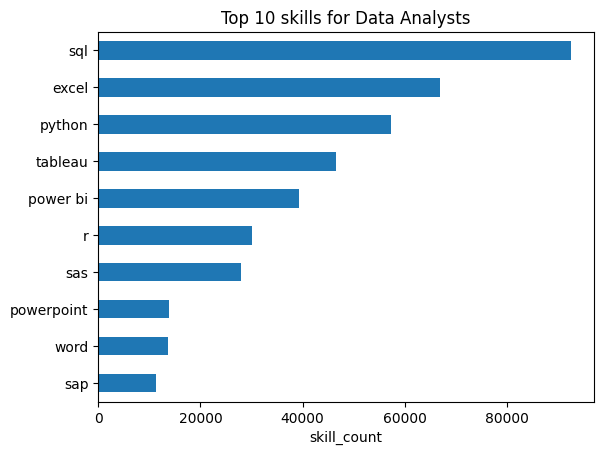

In [56]:
df_total_skill_count.plot(kind='barh',x='job_skills', y='skill_count')
plt.gca().invert_yaxis()

plt.title(f'Top {top_skills } skills for {job_title}s')
plt.ylabel("")
plt.xlabel('skill_count')
plt.legend().set_visible(False)
plt.show()
